In [1]:
import json

def read_json(file):
    with open(file) as f:
        data = json.load(f)
    return data

# data = read_json("data/v1_1_train_nus_ext_sample.json")
# results = read_json("outputs/v1_1_train_nus_ext_sample_llama_results.json")

data = read_json("../../../drivelm/challenge/test.json")
results = read_json("../../../drivelm/challenge/output.json")

In [12]:
from termcolor import colored
import matplotlib.pyplot as plt
from PIL import Image

IMAGE_DIR_PREFIX = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/cs503-project/data/train"

y_view_mapping = {"MIDDLE": 1, "LEFT": 0, "RIGHT": 2}

def display_next_prediction(data, results):
    results_map = {}

    for result in results:
        results_map[result["id"]] = result

    for scene_id, scene in data.items():
        frames = scene["key_frames"]

        for frame_id, frame in frames.items():
            qa = frame["QA"]
            image_paths = frame["image_paths"]
            tasks = ["perception", "prediction", "planning", "behavior"]

            for ti, task in enumerate(tasks):
                for qj, question in enumerate(qa[task]):
                    offset = sum([len(qa[t]) for t in tasks[:ti]])
                    question_id = f"{scene_id}_{frame_id}_{qj+offset}"
                    result = results_map[question_id]
                    print(f"{colored('Scene:', 'blue')} {scene_id}")
                    print(f"{colored('Frame:', 'blue')} {frame_id}")
                    print(f"{colored('Question:', 'blue')} {question['Q']}")
                    print(f"{colored('Answer:', 'blue')} {question['A']}")
                    print(f"{colored('Model Input:', 'blue')} {result['question']}")
                    print(f"{colored('Model Output:', 'blue')} {result['answer']}")
                    print(f"{colored('Images:', 'blue')}")
                    
                    fig, axes = plt.subplots(2, 3, figsize=(30, 10))
                    for i, (image_view, image_path) in enumerate(image_paths.items()):
                        image_path = image_path.replace("..", IMAGE_DIR_PREFIX)
                        image = Image.open(image_path)
                        _, x, y = f"{image_view}_MIDDLE".split("_")[:3]
                        x_id = int(x == 'BACK')
                        axes[x_id][y_view_mapping[y]].imshow(image)
                        axes[x_id][y_view_mapping[y]].set_title(image_view)
                        axes[x_id][y_view_mapping[y]].axis('off')
                    yield
            
            print()

In [13]:
predictions = iter(display_next_prediction(data, results))

Question: What object should the ego vehicle notice first when the ego vehicle is getting to the next possible location? What is the state of the object that is first noticed by the ego vehicle and what action should the ego vehicle take? What object should the ego vehicle notice second when the ego vehicle is getting to the next possible location? What is the state of the object perceived by the ego vehicle as second and what action should the ego vehicle take? What object should the ego vehicle notice third? What is the state of the object perceived by the ego vehicle as third and what action should the ego vehicle take?
Answer: Firstly, notice <c2,CAM_FRONT_RIGHT,124.2,565.0>. It is going ahead, so the ego vehicle should remain stationary. Secondly, notice <c3,CAM_FRONT,1019.7,456.3>. It is a traffic sign, so the ego vehicle should remain stationary. Thirdly, notice <c1,CAM_BACK,1160.0,653.3>. It is stationary, so the ego vehicle should remain stationary.
Model Input: <image>
What o

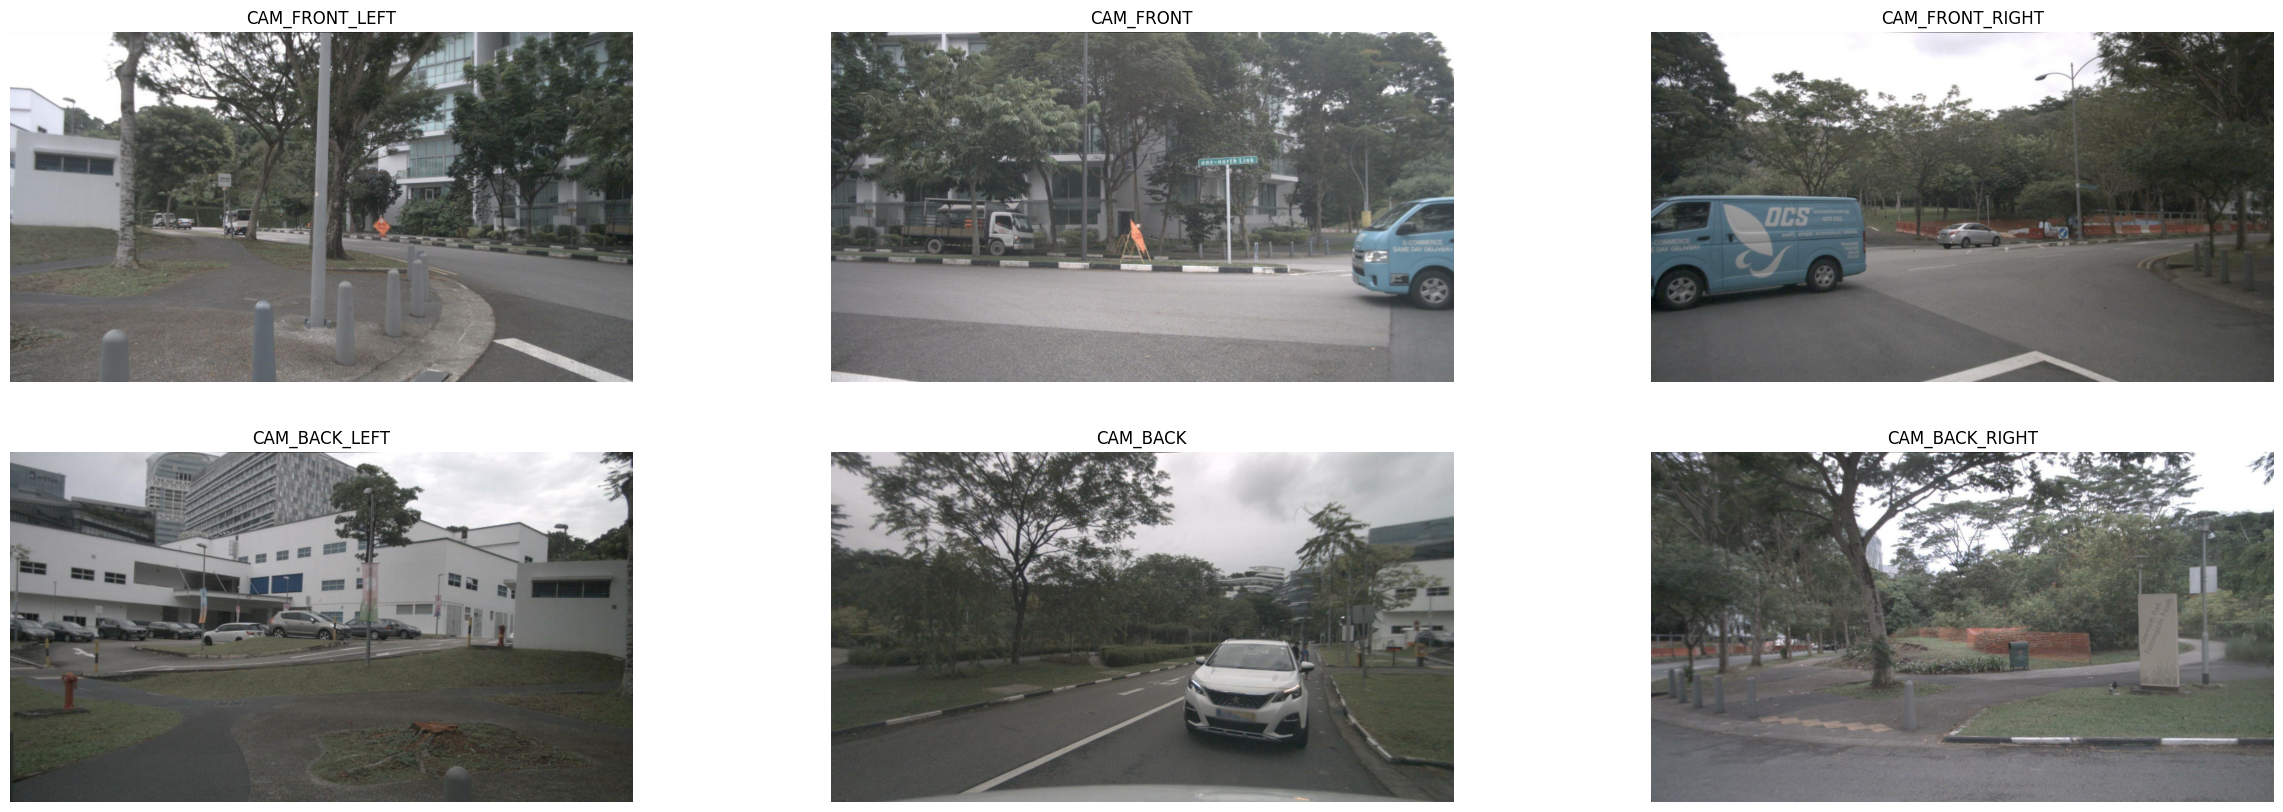

In [31]:
next(predictions)